In [68]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import scale 

In [69]:
df = pd.read_csv("./boston.csv")  # 

ds = df.values
print(ds.shape)
print(ds)

(506, 13)
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 7.8800e+00 1.1900e+01]]


In [70]:
x_data = np.array(ds[:, :12])  # x_data is ndarray
print(x_data)
y_data = ds[:,12]
print(y_data)
print('----')

print(x_data.shape)
print(y_data.shape)


[[6.3200e-03 1.8000e+01 2.3100e+00 ... 2.9600e+02 1.5300e+01 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 2.4200e+02 1.7800e+01 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 2.4200e+02 1.7800e+01 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.7300e+02 2.1000e+01 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.7300e+02 2.1000e+01 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.7300e+02 2.1000e+01 7.8800e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.

In [71]:
train_num = 300
valid_num = 100
test_num = len(x_data) - train_num - valid_num

# 训练集划分
x_train = x_data[:train_num]
y_train = y_data[:train_num]

# 验证集划分
x_valid = x_data[train_num : train_num+valid_num]
y_valid = y_data[train_num : train_num+valid_num]

# 测试集划分
x_test = x_data[train_num+valid_num : train_num+valid_num+test_num]
y_test = y_data[train_num+valid_num : train_num+valid_num+test_num]

In [72]:
"""
    转化数据类型
    并使用z-score对数据进行标准化
"""
x_train = tf.cast(scale(x_train), dtype=tf.float32)
x_valid = tf.cast(scale(x_valid), dtype=tf.float32)
x_test = tf.cast(scale(x_test), dtype=tf.float32)


In [73]:
# 公式对特征数据标准化
# for i in range(12):
#     x_data[:,i] = (x_data[:,i] - x_data[:,i].min()) / (x_data[:,i].max() - x_data[:,i].min())
#     print(x_data)
#     print('---')

In [74]:
# 模型定义
def model(x, w, b):
    return tf.matmul(x, w) + b

In [85]:
# 创建待优化变量
W = tf.Variable(tf.random.normal([12, 1], mean=0.0, stddev=1.0, dtype=tf.float32))
B = tf.Variable(tf.zeros(1), dtype=tf.float32)

print(W)
print(B)

<tf.Variable 'Variable:0' shape=(12, 1) dtype=float32, numpy=
array([[-0.30730367],
       [-1.0407506 ],
       [ 0.58761173],
       [ 0.5207237 ],
       [ 0.87343013],
       [-1.5480213 ],
       [ 0.5135749 ],
       [ 1.4469109 ],
       [ 1.0897613 ],
       [ 2.247619  ],
       [-2.2002652 ],
       [-0.5945762 ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [76]:
# 设置超参数
training_epochs = 50  # 迭代次数
learning_rate = 0.001  # 学习率
batch_size = 10  # 批量训练一次的样本量

In [77]:
# 采用均方差作为损失函数
def loss(x, y, w, b):  # x and y are vector
    err = model(x, w, b) - y
    squared_err = tf.square(err) 
    return tf.reduce_mean(squared_err)

In [78]:
def grad(x, y, w, b):
    with tf.GradientTape() as tape:
        loss_ = loss(x, y, w, b)
        return tape.gradient(loss_, [w, b])  # return gradient vector

In [79]:
# choose optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate)

In [91]:
# start train
loss_list_train = []
loss_list_valid = []
total_step = int(train_num / batch_size)

for epch in range(training_epochs):
    for step in range(total_step):
        xs = x_train[step*batch_size: (step+1)*batch_size, : ]
        ys = y_train[step*batch_size: (step+1)*batch_size]

        grads = grad(xs, ys, W, B)
        optimizer.apply_gradients(zip(grads,[W,B]))
        print(B)
        print(W)

    loss_train = loss(x_train, y_train, W, B).numpy()
    loss_valid = loss(x_valid, y_valid, W, B).numpy()
    loss_list_train.append(loss_train)
    loss_list_valid.append(loss_valid)
    print("epoch={:3d}, train_loss={:.4f}, valid_loss={:.4f}". format(epch+1,loss_train, loss_valid))


<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([25.501629], dtype=float32)>
<tf.Variable 'Variable:0' shape=(12, 1) dtype=float32, numpy=
array([[ 0.42425123],
       [ 0.14570029],
       [-0.66453516],
       [ 0.6985795 ],
       [-2.7314842 ],
       [ 1.2417248 ],
       [ 0.27945918],
       [-1.3420614 ],
       [ 0.42819837],
       [-0.40031204],
       [-2.9389982 ],
       [-0.9773977 ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([25.49768], dtype=float32)>
<tf.Variable 'Variable:0' shape=(12, 1) dtype=float32, numpy=
array([[ 0.4257911 ],
       [ 0.14622732],
       [-0.6639207 ],
       [ 0.69982105],
       [-2.7318587 ],
       [ 1.2435018 ],
       [ 0.27814284],
       [-1.3454341 ],
       [ 0.42705616],
       [-0.40024182],
       [-2.9353275 ],
       [-0.98072314]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([25.491974], dtype=float32)>
<tf.Variable 'Variable:0' shape=(12,

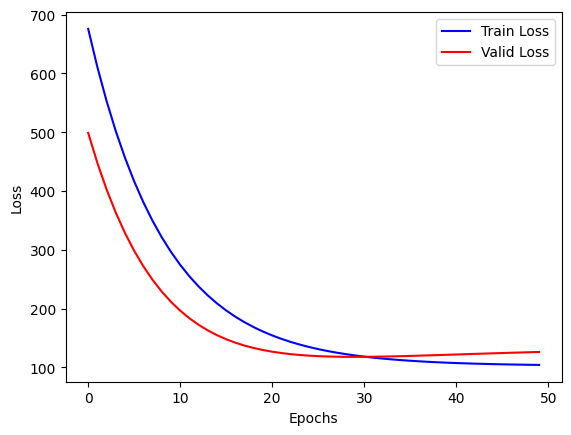

In [81]:
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(loss_list_train, "blue", label="Train Loss")
plt.plot(loss_list_valid, "red", label="Valid Loss")
plt.legend(loc=1)

In [83]:
print("Test_loss:{:.4f}".format(loss(x_test, y_test, W, B).numpy()))

Test_loss:119.2918


In [84]:
test_house_id = np.random.randint(0, test_num)
y = y_test[test_house_id]
y_pred = model(x_test, W, B)[test_house_id]
y_predit = tf.reshape(y_pred, ()).numpy()
print("House id", test_house_id, "Actual value", y, "Practice value", y_predit)

House id 76 Actual value 16.7 Practice value 25.600014
